In [1]:
import numpy as np
import glob
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
tumor=[]
path='./data/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    tumor.append(img)
if len(tumor)>91:
    tumor=random.sample(tumor,91)

In [3]:
healthy=[]
path='./data/brain_tumor_dataset/no/*.jpg'
for f in glob.iglob(path):
    img=cv2.imread(f)
    img=cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    healthy.append(img)

In [13]:
healthy=np.array(healthy)
tumor=np.array(tumor)
all=np.concatenate((healthy,tumor))


healthy_labels = np.zeros(len(healthy))  # 0 for healthy
tumor_labels = np.ones(len(tumor))      # 1 for tumor

# Combine data and labels
data = np.concatenate((healthy, tumor), axis=0)  # Combine images
labels = np.concatenate((healthy_labels, tumor_labels), axis=0)
# Normalize the data
data = data.astype('float32') / 255.0
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [12]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 21.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 12.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 9.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.4 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 7.2 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 6.7 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.6 MB/s eta 0:00:00
Using cached joblib-1.

In [5]:
# plt.imshow(healthy[15])
def plot_random(healthy,tumor,num=5):
     healthy_images=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
     tumor_imgs=tumor[np.random.choice(tumor.shape[0],num,replace=False)]
     
     plt.figure(figsize=(16,9))
     for i in  range(num):
         plt.subplot(1,num,i+1)
         plt.title('healthy')
         plt.imshow(healthy_images[i])
         
         
     plt.figure(figsize=(16,9))
     for i in  range(num):
         plt.subplot(1,num,i+1)
         plt.title('Tumor')
         plt.imshow(tumor_imgs[i])
#plotting 10 random brain images


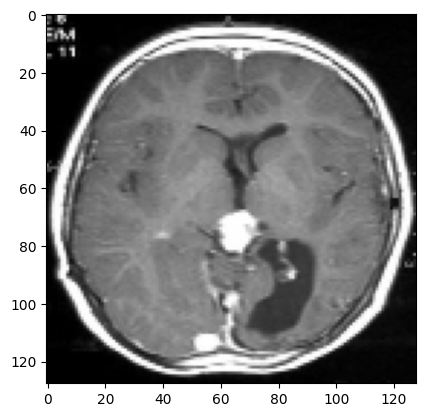

In [6]:
idx=random.randint(1,len(all))
plt.imshow(all[idx,:])
plt.show()


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),  # This will flatten the output into a single vector
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\ss044\anaconda3\envs\cnn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.7820 - loss: 0.4679 - val_accuracy: 0.7568 - val_loss: 0.4779
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.8484 - loss: 0.3524 - val_accuracy: 0.7838 - val_loss: 0.4187
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8943 - loss: 0.2129 - val_accuracy: 0.8108 - val_loss: 0.4208
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9924 - loss: 0.1057 - val_accuracy: 0.7568 - val_loss: 0.6670
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 1.0000 - loss: 0.0473 - val_accuracy: 0.8108 - val_loss: 0.6144
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.7838 - val_loss: 0.7161
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.8108 - val_loss: 0.9797
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.8108 - val_loss:

In [9]:
model.fit(data,labels, epochs=4,batch_size=64)

Epoch 1/4
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.5380 - loss: 1.1580
Epoch 2/4
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.5893 - loss: 0.8289
Epoch 3/4
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.6906 - loss: 0.5646
Epoch 4/4
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 0.7444 - loss: 0.4984


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8294 - loss: 1.0792
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


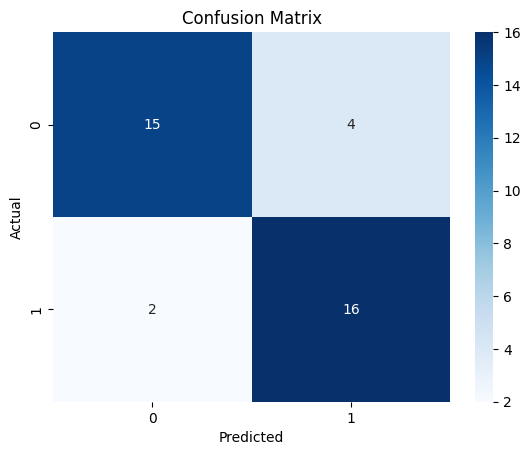

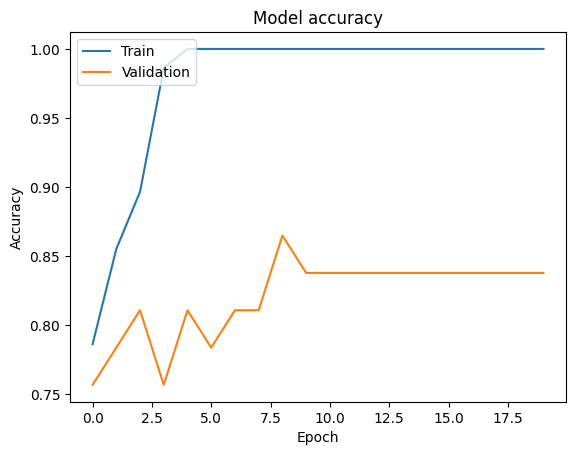

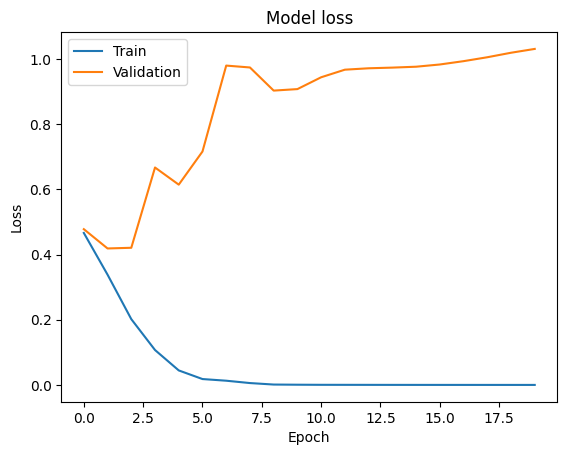

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns


val_loss, val_accuracy = model.evaluate(X_val, y_val)

y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)

report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

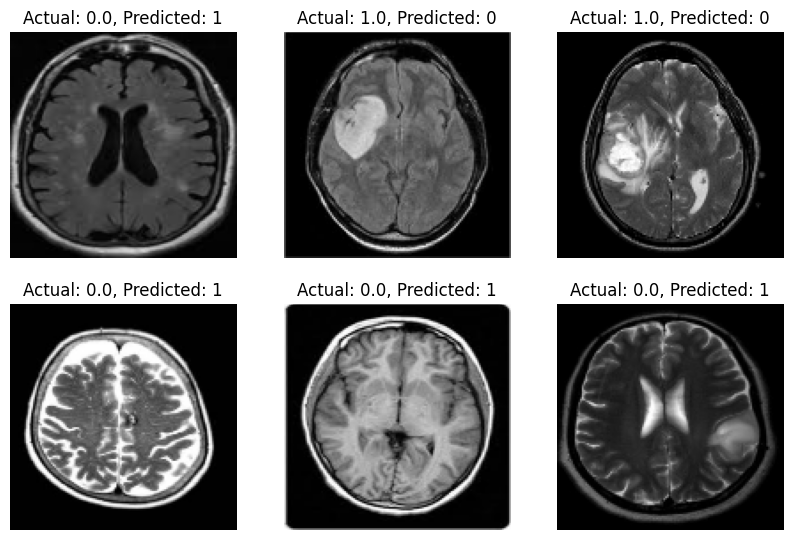

In [23]:
misclassified_indices = np.where(y_val != y_pred.flatten())[0]
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_val[index])
    plt.title(f'Actual: {y_val[index]}, Predicted: {y_pred[index][0]}')
    plt.axis('off')
plt.show()

In [19]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
